# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Rishi\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


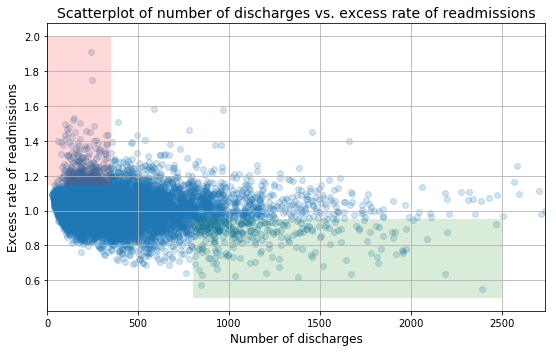

In [77]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges (RP:May not be true)
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 (RP: Validate)
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<b>Answer A:</b> Analysis above falls short a bit. It is based entirely on the scatter plot and may not be the best representation of the dataset. There is not statistical hypothesis tested, with broad statements made which fall short and need to be backed up with some analysis. 

The statistics are not clear and there seem to be 2 primary groups. Less than 100 and greater than 1000. It is extremely hard to interpret anything that falls between those groups in the plot. However, the recommendation made for less than 300 seems to be arbitary and no calculation backs up that number. This seems to be a generlization from statistics derived and could be incorrect. Again, the statistics are not backed up by numbers.

Lets explore some of those numbers below.



In [34]:
# Your turn
# a = np.array(np.isnan(clean_hospital_read_df[clean_hospital_read_df['Footnote'] > 0]['Footnote']) )
b = clean_hospital_read_df[clean_hospital_read_df['Footnote'] > 0]['Excess Readmission Ratio']
# clean_hospital_read_df[pd.DataFrame(np.isnan(b))]
# clean_hospital_read_df[~np.isnan(b)]
clean_hospital_read_df[81:].head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


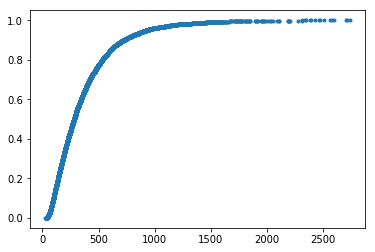

In [26]:
# Exliminate the bottom 3 records.
clean_limited_h_r_df = clean_hospital_read_df[81:-3]

# Define ECDF function and plot it
def ecdf(data):
    data_s = np.sort(data)
    x = data_s
    y = np.arange(1, len(x) + 1)/len(x) 
    return(x,y)

NoD_x, NoD_y = ecdf(clean_limited_h_r_df['Number of Discharges'])
_ = plt.plot(NoD_x,NoD_y,marker='.',linestyle='none')

In [33]:
#clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'].head()

##### Validate the statements: 
i. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

ii. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

iii. In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 (RP: Validate)

iv. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

Assume lower = 350 or less, based on red shaded area.



In [31]:
# Lets validate #i and ii.
lower_discharges = clean_limited_h_r_df[clean_limited_h_r_df['Number of Discharges'] <= 350]['Excess Readmission Ratio']
higher_discharges = clean_limited_h_r_df[clean_limited_h_r_df['Number of Discharges'] > 350]['Excess Readmission Ratio']
print('Readmission rate with lower discharges: ', lower_discharges.mean())
print('Readmission rate with higher discharges: ', higher_discharges.mean())
print('There is slightly lower rate of readmissions, but not that significant')

Readmission rate with lower discharges:  1.0132787273505486
Readmission rate with higher discharges:  0.9985740691192894
There is slightly lower rate of readmissions, but not that significant


In [32]:
# Lets validate #iii and iv.
lt100_discharges = clean_limited_h_r_df[clean_limited_h_r_df['Number of Discharges'] < 100]['Excess Readmission Ratio']
gt1000_discharges = clean_limited_h_r_df[clean_limited_h_r_df['Number of Discharges'] > 1000]['Excess Readmission Ratio']
print('Mean ERR less than 100 is: ', lt100_discharges.mean(), ' and % > 1 is: ', lt100_discharges[lt100_discharges>1].size * 100/lt100_discharges.size, '%')
print('Mean ERR greater than 100 is: ', gt1000_discharges.mean(), ' and % > 1 is: ', gt1000_discharges[gt1000_discharges>1].size * 100/gt1000_discharges.size, '%')
print('The claim seems to be valid')

Mean ERR less than 100 is:  1.0226183501683506  and % > 1 is:  63.215488215488215 %
Mean ERR greater than 100 is:  0.9790730434782613  and % > 1 is:  44.56521739130435 %
The claim seems to be valid


In [40]:
# It can be seen that number of discharges for 'READM-30-HIP-KNEE-HRRP' seem to be excessive in less than 100.
lt_discharges = clean_limited_h_r_df[clean_limited_h_r_df['Number of Discharges'] < 100]
print(lt_discharges.groupby(['Measure Name'])['Excess Readmission Ratio'].mean())
gt_discharges = clean_limited_h_r_df[(clean_limited_h_r_df['Number of Discharges'] > 1000) & (clean_limited_h_r_df['Number of Discharges'] > 1000)]
print(gt_discharges.groupby(['Measure Name'])['Excess Readmission Ratio'].count())


Measure Name
READM-30-AMI-HRRP         1.030549
READM-30-COPD-HRRP        1.005972
READM-30-HF-HRRP          1.017506
READM-30-HIP-KNEE-HRRP    1.335367
READM-30-PN-HRRP          1.019898
Name: Excess Readmission Ratio, dtype: float64
Measure Name
READM-30-AMI-HRRP          31
READM-30-COPD-HRRP         55
READM-30-HF-HRRP          177
READM-30-HIP-KNEE-HRRP    141
READM-30-PN-HRRP           56
Name: Excess Readmission Ratio, dtype: int64


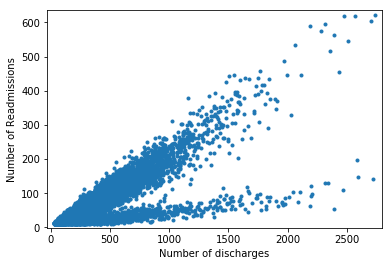

0.802485320133


In [73]:
# Lets see the correlation in a plot between Number of discharges and Number of Readmissions
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

dis = clean_limited_h_r_df['Number of Discharges']
reds = clean_limited_h_r_df['Number of Readmissions']
_ = plt.plot(dis,reds,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Number of Readmissions')
plt.show()

obs_p = pearson_r(dis,reds)

print(obs_p)

#### There seems to be significant correlation between the 2. But there are 2 distinct groups observed. Lets explore more

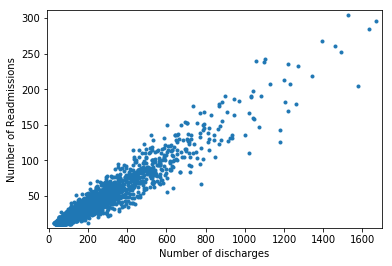

0.951448947102


In [74]:
# Lets see the correlation for each of these groups
ami = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] == 'READM-30-AMI-HRRP']
copd = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] == 'READM-30-COPD-HRRP']
hf = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] == 'READM-30-HF-HRRP']
hk = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP']
pn = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] == 'READM-30-PN-HRRP']
n_hk = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] != 'READM-30-HIP-KNEE-HRRP']
n_hf = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] != 'READM-30-HF-HRRP']
n_ami = clean_limited_h_r_df[clean_limited_h_r_df['Measure Name'] != 'READM-30-HIP-KNEE-HRRP']

dis_ami = ami['Number of Discharges']
reds_ami = ami['Number of Readmissions']

_ = plt.plot(dis_ami,reds_ami,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Number of Readmissions')
plt.show()

print(pearson_r(dis_ami,reds_ami))

#### Very high correlation for READM-30-AMI-HRRP

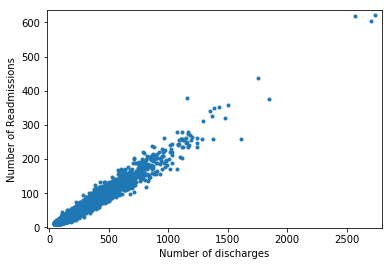

0.976637435364


In [45]:
dis_copd = copd['Number of Discharges']
reds_copd = copd['Number of Readmissions']

_ = plt.plot(dis_copd,reds_copd,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Number of Readmissions')
plt.show()

print(pearson_r(dis_copd,reds_copd))

#### Very high correlation for READM-30-COPD-HRRP

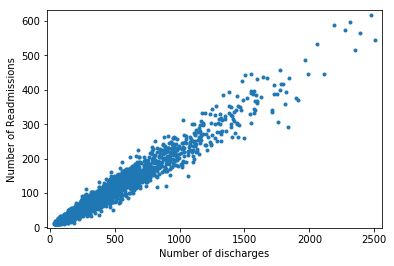

0.977713763881


In [16]:
dis_hf = hf['Number of Discharges']
reds_hf = hf['Number of Readmissions']

_ = plt.plot(dis_hf,reds_hf,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Number of Readmissions')
plt.show()

print(pearson_r(dis_hf,reds_hf))

#### Very high correlation for READM-30-HF-HRRP

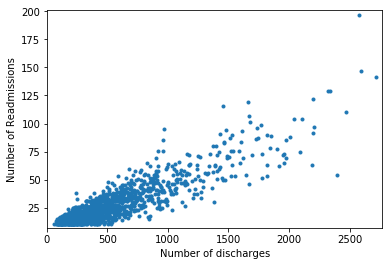

0.885504611639


In [17]:
dis_hk = hk['Number of Discharges']
reds_hk = hk['Number of Readmissions']

_ = plt.plot(dis_hk,reds_hk,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Number of Readmissions')
plt.show()

print(pearson_r(dis_hk,reds_hk))

#### High correlation for READM-30-HIP-KNEE-HRR

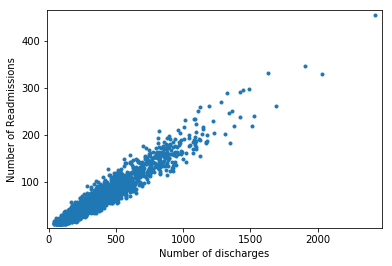

0.963445823904


In [93]:
dis_pn = pn['Number of Discharges']
reds_pn = pn['Number of Readmissions']

_ = plt.plot(dis_pn,reds_pn,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Number of Readmissions')
plt.show()

print(pearson_r(dis_pn,reds_pn))

#### Very high correlation for READM-30-PN-HRRP

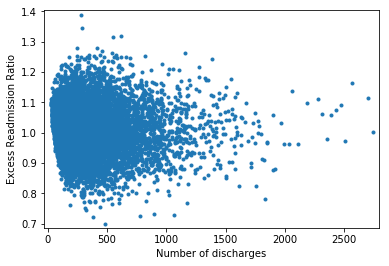

-0.00873655411367


In [95]:
dis_n_hk = n_hk['Number of Discharges']
reds_n_hk = n_hk['Excess Readmission Ratio']

_ = plt.plot(dis_n_hk,reds_n_hk,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()

print(pearson_r(dis_n_hk,reds_n_hk))

#### Very low correlation where it is not READM-30-HIP-KNEE-HRRP
### Hypothesis #1
#### Test null hypothesis that the Number of Discharges are not correlated to Number of Readmissions. 

In [103]:
dis = clean_limited_h_r_df['Number of Discharges']
reds = clean_limited_h_r_df['Number of Readmissions']
size = 10000
perm_res = np.empty(size)
for i in range(size):
    reds_p = np.random.permutation(reds)
    perm_res[i] = pearson_r(dis,reds_p)
p_val = np.sum(perm_res >= obs_p)/len(perm_res)
print('The p-value that the pearson coefficient is by chance is : ',p_val)


The p-value that the pearson coefficient is by chance is :  1.0



##### As you can see that the probability of that is 0. Less than the alpha of 0.1. Meaning that the two are definitely correlated. 
However, you can also see that the lowest correlation is for 'READM-30-HIP-KNEE-HRR'. Lets explore this a bit more

### Hypothesis #2
#### Now we test another hypothesis. We take a subset of data for Measure name that are specific to 'READM-30-HIP-KNEE-HRRP'

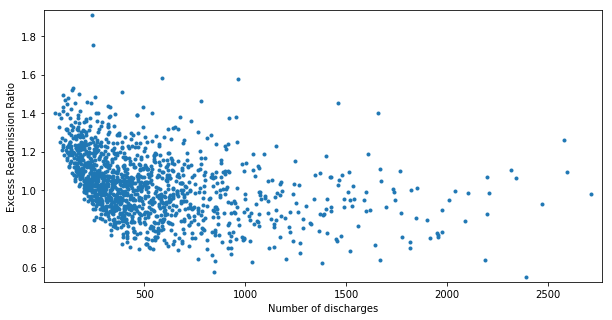

Observed pearson coefficient of READM-30-HIP-KNEE-HRRP measures is:  -0.360949691977
The p-value of this happening by chance is :  0.0


In [21]:
dis_hk = hk['Number of Discharges']
reds_hk = hk['Excess Readmission Ratio']

_ = plt.figure(figsize=(10,5))
_ = plt.plot(dis_hk,reds_hk,marker='.',linestyle='none')
_ = plt.margins(0.02)                     
plt.xlabel('Number of discharges')
plt.ylabel('Excess Readmission Ratio')

plt.show()

obs_p_hk = pearson_r(dis_hk,reds_hk)

print('Observed pearson coefficient of READM-30-HIP-KNEE-HRRP measures is: ', obs_p_hk)

# We will check if this is by chance. 

size = 10000
perm_hk = np.empty(size)

for i in range(size):
    perm_reds_hk = np.random.permutation(reds_hk)
    perm_hk[i] = pearson_r(dis_hk,perm_reds_hk)
    
p_val_hk = np.sum(perm_hk <= obs_p_hk)/len(perm_hk)

print('The p-value of this happening by chance is : ', p_val_hk)


#### As you can see, the correlation of number of discharges to Excess Readmission Ratio is negative, and by far is the major factor affecting the original comparison. Also, the probability of that happening by chance is 0.

What can be concluded is that due to the negative correlation, this particular type of measure should be avoided at the smaller hospitals. Bigger hospitals with larger discharge rates seems to have smaller Excess Readmission Ratio. If this one thing is fixed, it may bring down the overall ratio. 
